# Read data file

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
from pandas import read_csv
A = read_csv("E:/Data Science/Datasets/Cars93.csv")

In [2]:
A.head(3)

,Id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


# Missing data treatment

In [3]:
A.isna().sum()

Id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [4]:
from ml_functions import Missing_data
md = Missing_data()
md.replacer(A)

In [5]:
A.isna().sum()

Id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

# Delete unique Data columns

In [6]:
A.Id.value_counts()

1     1
60    1
69    1
68    1
67    1
     ..
30    1
29    1
28    1
27    1
93    1
Name: Id, Length: 93, dtype: int64

In [7]:
A.Manufacturer.value_counts()

Chevrolet        8
Ford             8
Dodge            6
Mazda            5
Pontiac          5
Nissan           4
Hyundai          4
Toyota           4
Buick            4
Volkswagen       4
Oldsmobile       4
Subaru           3
Honda            3
Cadillac         2
Mercedes-Benz    2
Lexus            2
Eagle            2
Geo              2
Audi             2
Volvo            2
Mercury          2
Mitsubishi       2
Lincoln          2
Chrysler         2
Acura            2
Plymouth         1
Saturn           1
Saab             1
Suzuki           1
Chrylser         1
BMW              1
Infiniti         1
Name: Manufacturer, dtype: int64

In [8]:
A.Model.value_counts()

Escort    1
RX-7      1
Loyale    1
Camaro    1
Storm     1
         ..
Previa    1
240       1
Q45       1
Astro     1
LeMans    1
Name: Model, Length: 93, dtype: int64

In [9]:
A.Make.value_counts()

Chevrolet Caprice     1
Chrysler Imperial     1
Hyundai Elantra       1
Dodge Spirit          1
Ford Aerostar         1
                     ..
Chevrolet Corsica     1
Mazda Protege         1
Buick Century         1
Honda Prelude         1
Pontiac Bonneville    1
Name: Make, Length: 93, dtype: int64

In [10]:
A = A.drop(labels=["Id","Manufacturer","Model","Make"],axis=1)

In [11]:
A.head(3)

,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA


# Declare X and Y

In [12]:
X = A.drop(labels=["Type"],axis=1)
Y = A[["Type"]]

In [13]:
X.columns

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags',
       'DriveTrain', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM',
       'Rev.per.mile', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Origin'],
      dtype='object')

In [14]:
Y.columns

Index(['Type'], dtype='object')

In [15]:
X.head(2)

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA


In [16]:
Y.head(2)

,Type
0,Small
1,Midsize


# EDA (Exporatory Data Analysis)

In [17]:
from ml_functions import EDA
eda =EDA()
cat,con = md.catconsep(X)

# a) Univariate

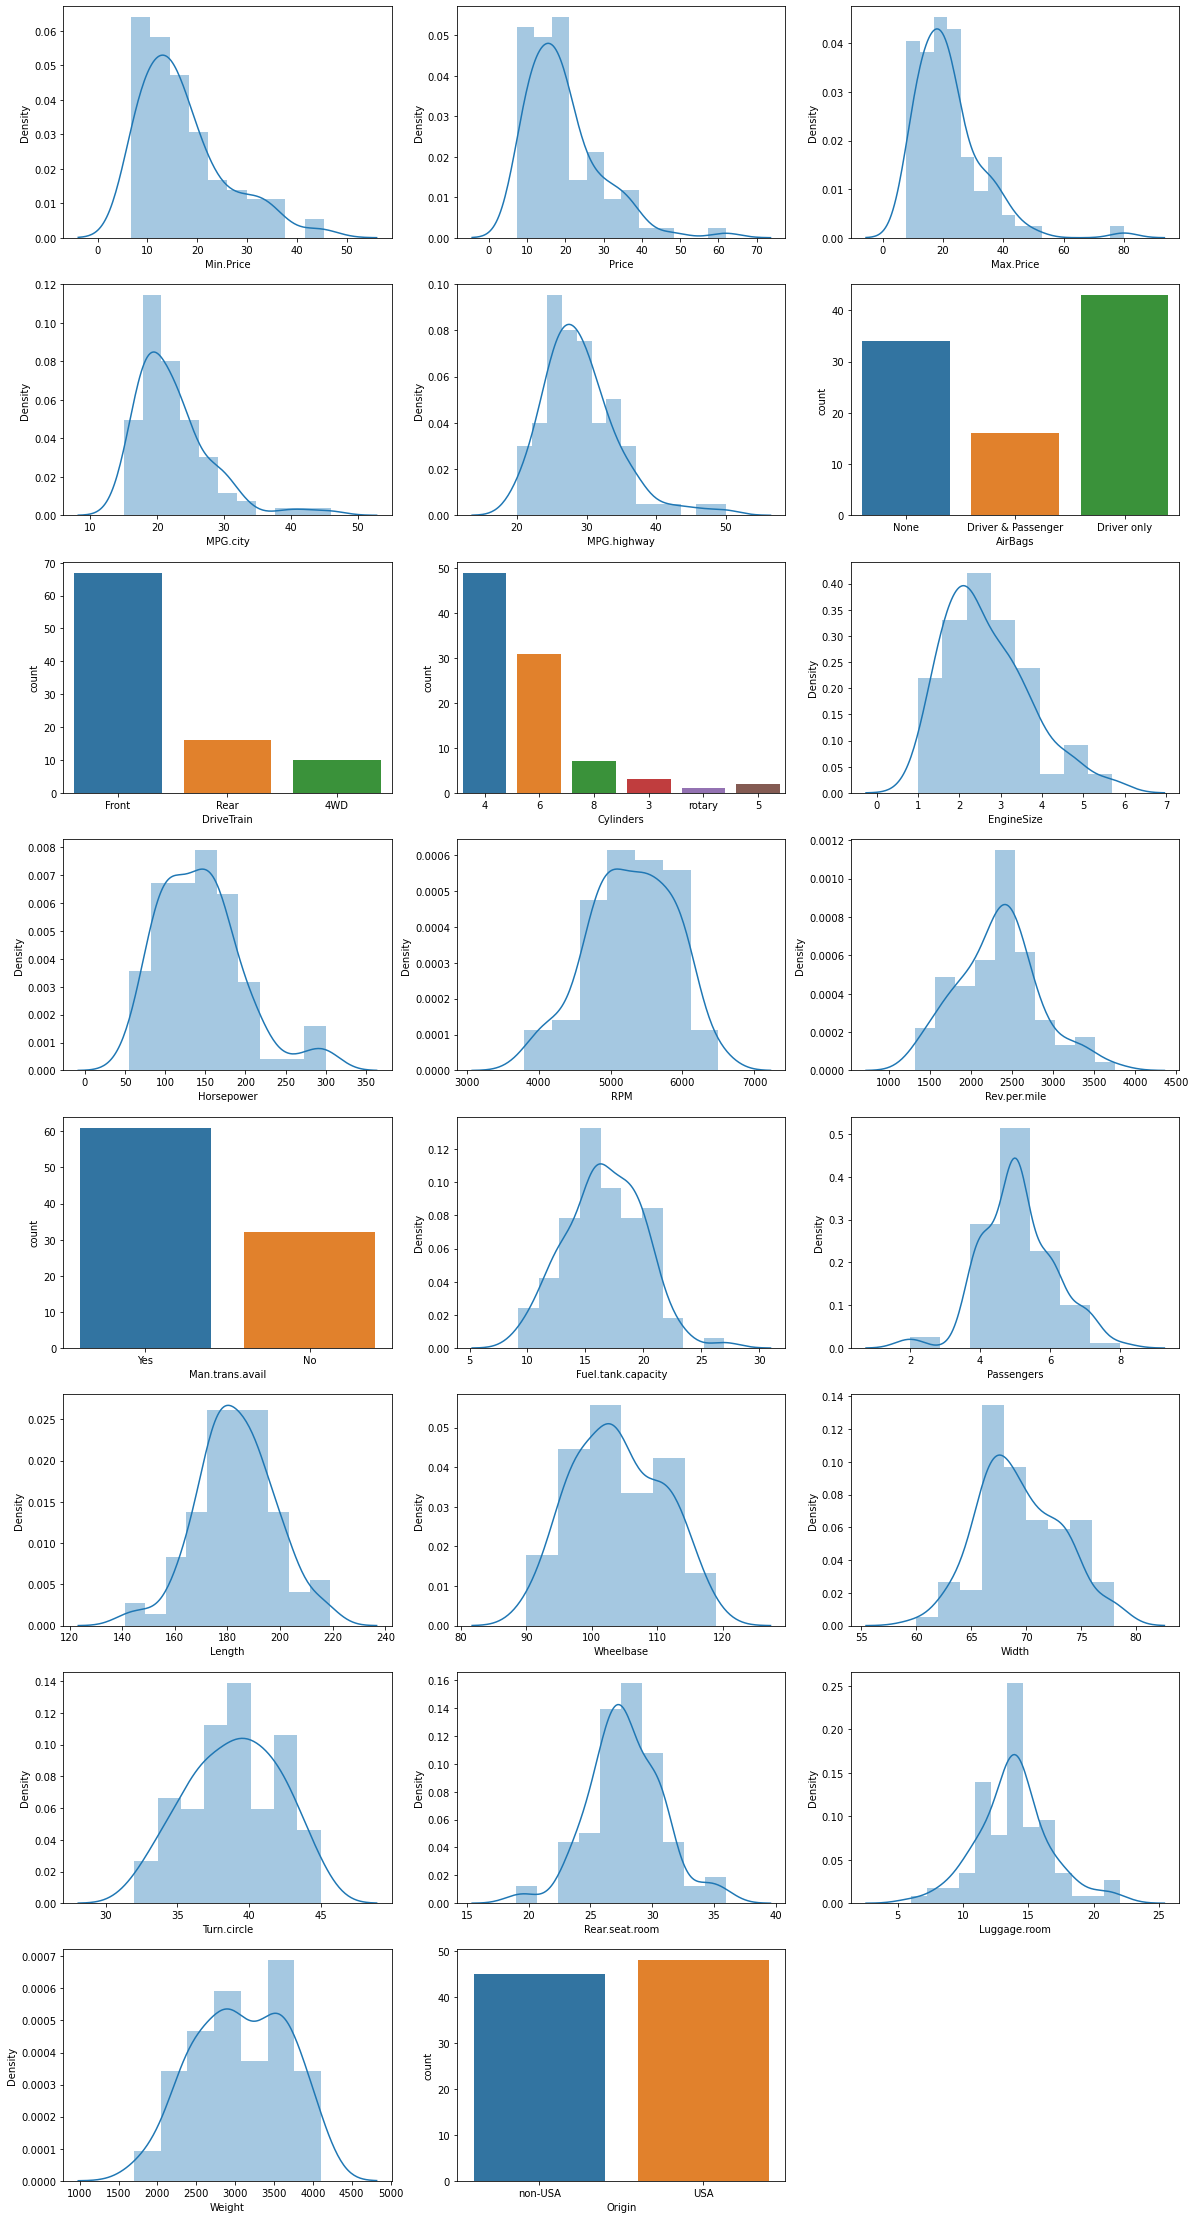

In [18]:
eda.univariate(X,cat,con)

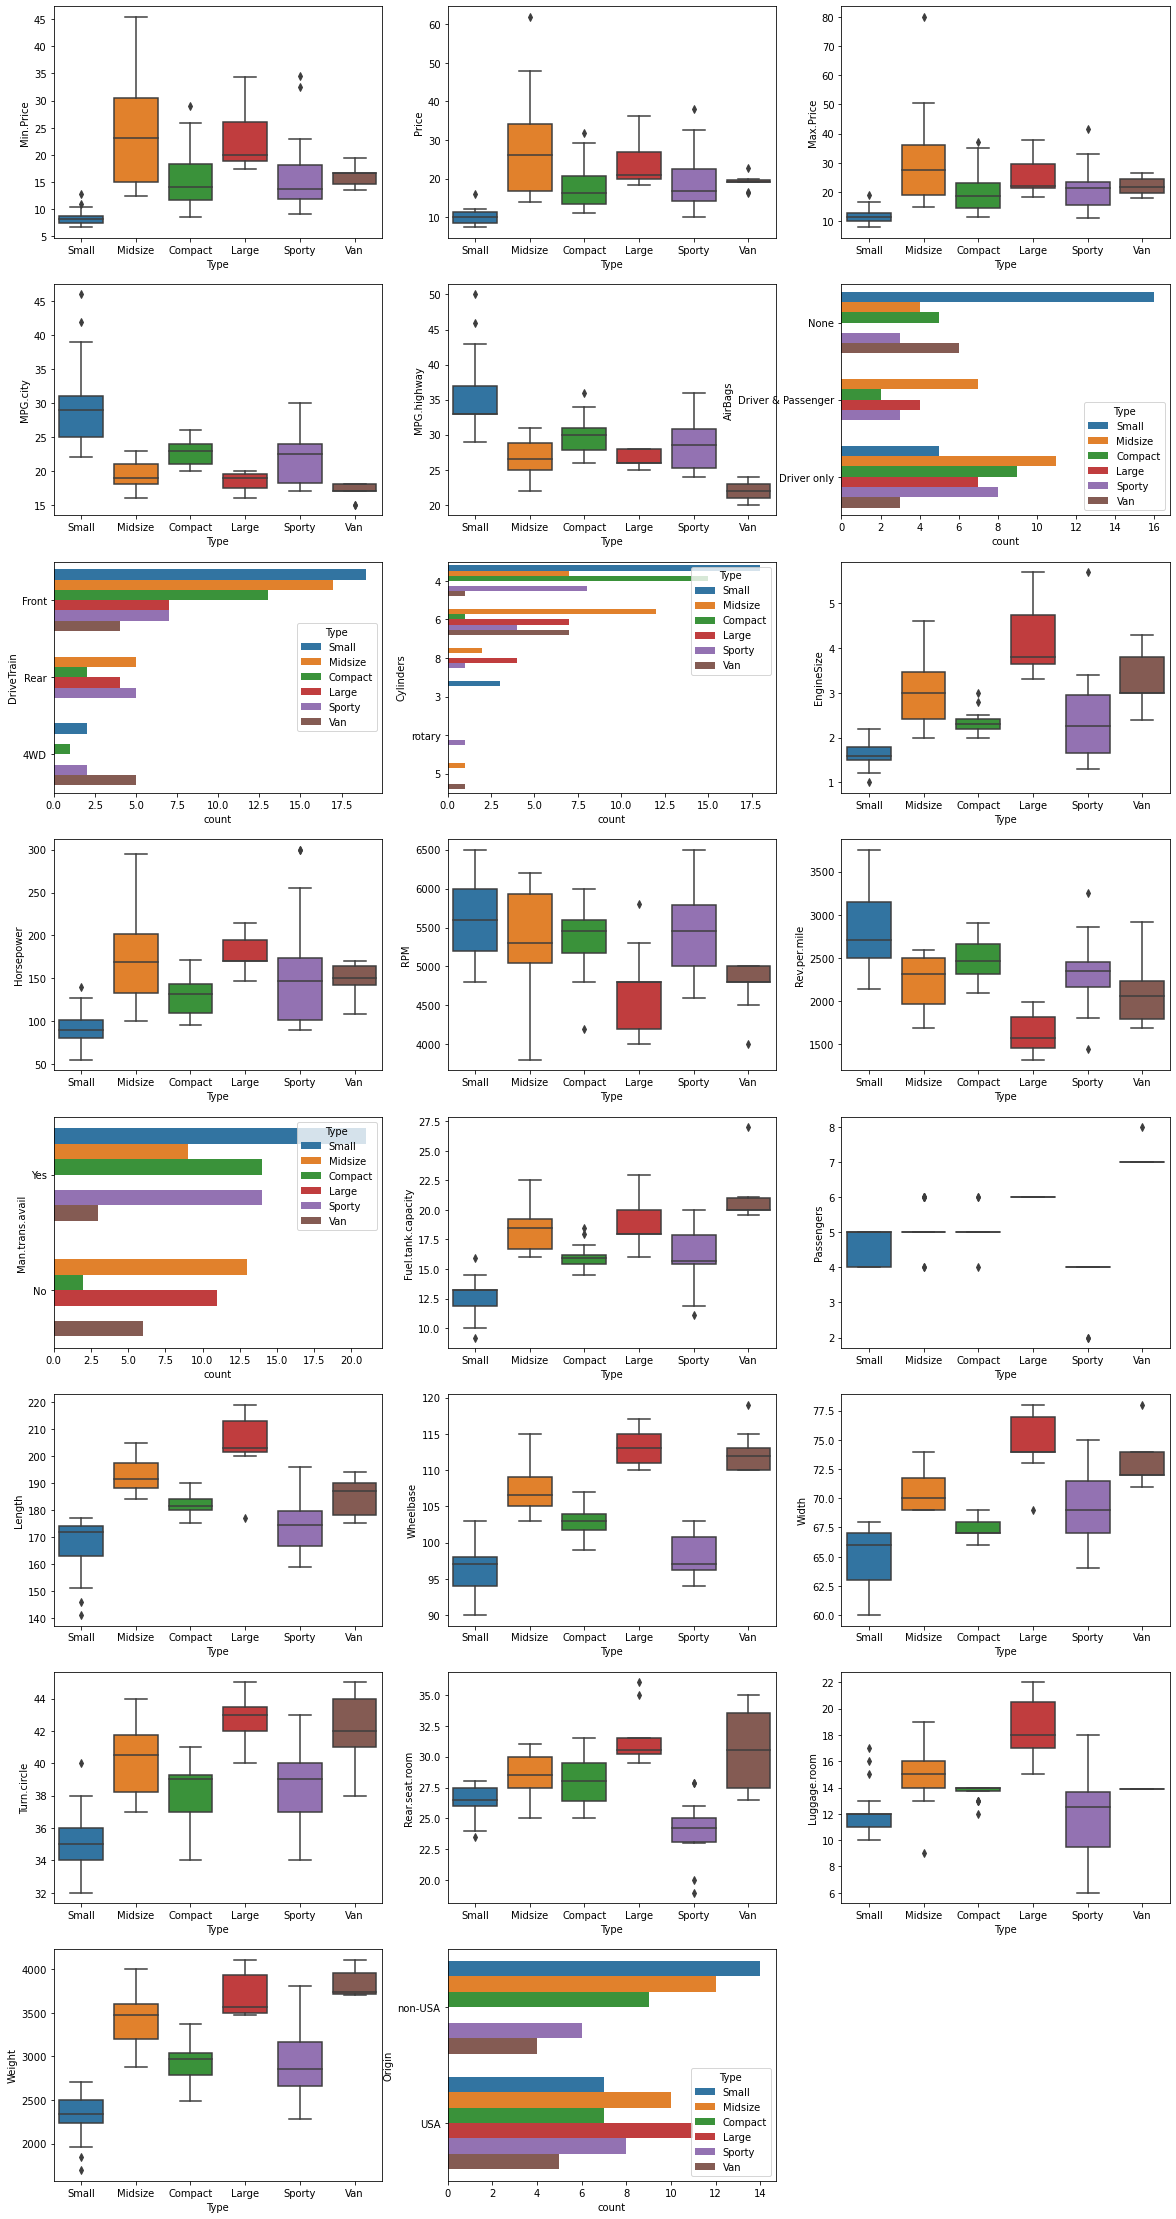

In [19]:
eda.bivariate_ycat(X,Y,cat,con)

# Data Preprocessing

In [20]:
X[con].skew()

Min.Price             1.182989
Price                 1.533082
Max.Price             2.033859
MPG.city              1.704430
MPG.highway           1.229897
EngineSize            0.859418
Horsepower            0.951728
RPM                  -0.258533
Rev.per.mile          0.281546
Fuel.tank.capacity    0.108146
Passengers            0.062517
Length               -0.090095
Wheelbase             0.113727
Width                 0.264027
Turn.circle          -0.133569
Rear.seat.room        0.079079
Luggage.room          0.243968
Weight               -0.143669
dtype: float64

In [21]:
from numpy import log
A["Max.Price"] = log(A["Max.Price"])
A["Min.Price"] = log(A["Min.Price"])
A["Price"] = log(A["Price"])
A["MPG.city"] = log(A["MPG.city"])
A["MPG.highway"] = log(A["MPG.highway"])
A["EngineSize"] = log(A["EngineSize"])
A["Horsepower"] = log(A["Horsepower"])

In [22]:
A[con].skew()

Min.Price             0.234599
Price                 0.261374
Max.Price             0.274890
MPG.city              0.916866
MPG.highway           0.550401
EngineSize            0.050086
Horsepower           -0.019197
RPM                  -0.258533
Rev.per.mile          0.281546
Fuel.tank.capacity    0.108146
Passengers            0.062517
Length               -0.090095
Wheelbase             0.113727
Width                 0.264027
Turn.circle          -0.133569
Rear.seat.room        0.079079
Luggage.room          0.243968
Weight               -0.143669
dtype: float64

In [23]:
X = md.preprocessing(X)

In [24]:
X.head(3)

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_No,Man.trans.avail_Yes,Origin_USA,Origin_non-USA
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0,1,0,0,0,0,0,1,0,1
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0,0,0,1,0,0,0,1,0,1
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0,0,0,1,0,0,0,1,0,1


In [25]:
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
le = LabelEncoder()
Y = DataFrame(le.fit_transform(Y),columns=["Type"])

In [26]:
Y.head(3)

,Type
0,3
1,2
2,0


# Divide data into training and testing

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=32)

# Creating ML Models and choose one of the best

# 1) Logistic Classification

In [28]:
from ml_functions import Model_maker
mm = Model_maker()
lr_model = mm.maker_Logistic_model(xtrain,ytrain)

In [29]:
from ml_functions import Model_accuracy_measure
mam = Model_accuracy_measure()
lr_model_tr_err,lr_model_ts_err = mam.classifier_acccuracy(xtrain,ytrain,xtest,ytest,lr_model)

In [30]:
print("Logistic Regression Train Accuracy: ",lr_model_tr_err)
print("Logistic Regression Test Accuracy: ",lr_model_ts_err)

Logistic Regression Train Accuracy:  0.99
Logistic Regression Test Accuracy:  0.89


# 2) Naive Bayes Classification

In [31]:
model_nb = mm.maker_naive_bayes_model(xtrain,ytrain)

In [32]:
model_nb_tr_err,model_nb_ts_err = mam.classifier_acccuracy(xtrain,ytrain,xtest,ytest,model_nb)

In [33]:
print("Naive Bayes Train Accuracy: ",model_nb_tr_err)
print("Naive Bayes Test Accuracy: ",model_nb_ts_err)

Naive Bayes Train Accuracy:  0.78
Naive Bayes Test Accuracy:  0.79


# 3) Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
tg = {"min_samples_split":range(2,6,1),"min_samples_leaf":range(2,6,1),"max_depth":range(2,6,1)}
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [35]:
model_dtc = mm.maker_dt_classifier_model(xtrain,ytrain,21,5,2,2)

In [36]:
model_dtc_tr_err,model_dtc_ts_err = mam.classifier_acccuracy(xtrain,ytrain,xtest,ytest,model_dtc)

In [37]:
print("Decision Tree Classifier Train Accuracy: ",model_dtc_tr_err)
print("Decision Tree Classifier Test Accuracy: ",model_dtc_ts_err)

Decision Tree Classifier Train Accuracy:  0.92
Decision Tree Classifier Test Accuracy:  0.68


# 4) Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(random_state=21)
tg = {"n_estimators":range(2,15,1),"max_depth":range(2,6,1)}
cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 5, 'n_estimators': 14}

In [39]:
model_rfc = mm.maker_rand_for_classi_model(xtrain,ytrain,14,21,5)

In [40]:
model_rfc_tr_err,model_rfc_ts_err = mam.classifier_acccuracy(xtrain,ytrain,xtest,ytest,model_rfc)

In [41]:
print("Random Forest Classifier Train Accuracy: ",model_rfc_tr_err)
print("Random Forest Classifier Test Accuracy: ",model_rfc_ts_err)

Random Forest Classifier Train Accuracy:  0.97
Random Forest Classifier Test Accuracy:  0.84


# 5) Adaboost Classification

In [42]:
from sklearn.ensemble import AdaBoostClassifier

tg = {"n_estimators":range(2,15,1)}
abrm = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),random_state=21)
cv = GridSearchCV(abrm,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 5}

In [43]:
model_abc = mm.maker_Adb_classi_model(xtrain,ytrain,21,21,5,2)

In [44]:
model_abc_tr_err,model_abc_ts_err = mam.classifier_acccuracy(xtrain,ytrain,xtest,ytest,model_abc)

In [45]:
print("Adaboost Classifiction Train Accuracy: ",model_abc_tr_err)
print("Adaboost Classifiction Test Accuracy: ",model_abc_ts_err)

Adaboost Classifiction Train Accuracy:  0.82
Adaboost Classifiction Test Accuracy:  0.53


# 6) KNN Classification

In [46]:
from sklearn.neighbors import KNeighborsClassifier

tg = {"n_neighbors":range(2,15,1)}
knn = KNeighborsClassifier()
cv = GridSearchCV(knn,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_neighbors': 3}

In [47]:
model_knn = mm.maker_knn_classifier_model(xtrain,ytrain,3)

In [48]:
model_knn_tr_err,model_knn_ts_err = mam.classifier_acccuracy(xtrain,ytrain,xtest,ytest,model_knn)

In [49]:
print("KNN Classifiction Train Accuracy: ",model_knn_tr_err)
print("KNN Classifiction Test Accuracy: ",model_knn_ts_err)

KNN Classifiction Train Accuracy:  0.81
KNN Classifiction Test Accuracy:  0.68


# Logistic Classification Model is the best model among all So, use Logistic Classifier

In [50]:
pred = lr_model.predict(xtest)
pred_type = le.inverse_transform(pred)
actual_type = le.inverse_transform(ytest["Type"])

In [51]:
pred_type

array(['Small', 'Sporty', 'Sporty', 'Sporty', 'Midsize', 'Midsize',
       'Sporty', 'Compact', 'Large', 'Small', 'Midsize', 'Large', 'Small',
       'Compact', 'Sporty', 'Compact', 'Small', 'Large', 'Midsize'],
      dtype=object)

In [52]:
actual_type

array(['Small', 'Sporty', 'Sporty', 'Sporty', 'Midsize', 'Midsize',
       'Sporty', 'Compact', 'Large', 'Small', 'Midsize', 'Large', 'Small',
       'Small', 'Sporty', 'Small', 'Small', 'Large', 'Midsize'],
      dtype=object)

In [53]:
import pandas as pd
result = pd.DataFrame([actual_type,pred_type]).T
result.columns = ["actual_type","predicted_type"]

In [54]:
result

,actual_type,predicted_type
0,Small,Small
1,Sporty,Sporty
2,Sporty,Sporty
3,Sporty,Sporty
4,Midsize,Midsize
5,Midsize,Midsize
6,Sporty,Sporty
7,Compact,Compact
8,Large,Large
9,Small,Small


# Train Logistic Model with whole data

In [55]:
fin_lr_model = mm.maker_Logistic_model(X,Y)